# Detection

In [13]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # use CPU
import sys
import random
import skimage.io
import matplotlib


# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
import mrcnn.model as modellib
from mrcnn import visualize


%matplotlib inline 
LOAD_DIR=ROOT_DIR+"/NUbotsDataSet/"
print(LOAD_DIR)

# Local path to trained weights file
MODEL_Path = LOAD_DIR+ "mask_rcnn_nubots_0014.h5"
print("weights:",MODEL_Path)

# Directory of images to run detection on
# test imags
IMAGE_Path =  LOAD_DIR+ "test/imags/" # realPhoto  igball

realPhoto =  LOAD_DIR+ "test/realPhoto/"# realPhoto
print("imgs:",IMAGE_Path)


D:\uni\COMP3850\NUbot\Mask_RCNN_NUbots\NUbotsModel/NUbotsDataSet/
weights: D:\uni\COMP3850\NUbot\Mask_RCNN_NUbots\NUbotsModel/NUbotsDataSet/mask_rcnn_nubots_0014.h5
imgs: D:\uni\COMP3850\NUbot\Mask_RCNN_NUbots\NUbotsModel/NUbotsDataSet/test/imags/


In [6]:
class NUbotsConfig(Config):
    """Configuration for training on the NUbots dataset.
    Derives from the base Config class and overrides values specific
    to the NUbots field dataset.
    """
    # resnet50 , resnet101
    BACKBONE = "resnet101"
    # Give the configuration a recognizable name
    NAME = "NUbots"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1 

    # Number of classes (including background)
    NUM_CLASSES = 1 + 4  # background + 4 objects

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 512 #512
    IMAGE_MAX_DIM = 640 #640
    

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (32, 64, 128, 256, 512)  # anchor side in pixels
                       #(8, 16, 32, 64, 128)

    

Nubots_config = NUbotsConfig()
Nubots_config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [7]:

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_Path,config=Nubots_config)

model.load_weights(MODEL_Path,by_name=True)

# Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ["BG", 'goal','field', 'marking', 'ball'] # ["goal", "field", "marking", "ball"]

Processing 1 images
image                    shape: (1024, 1280, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 640, 640, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 102300, 4)        min:   -0.56657  max:    1.46641  float32


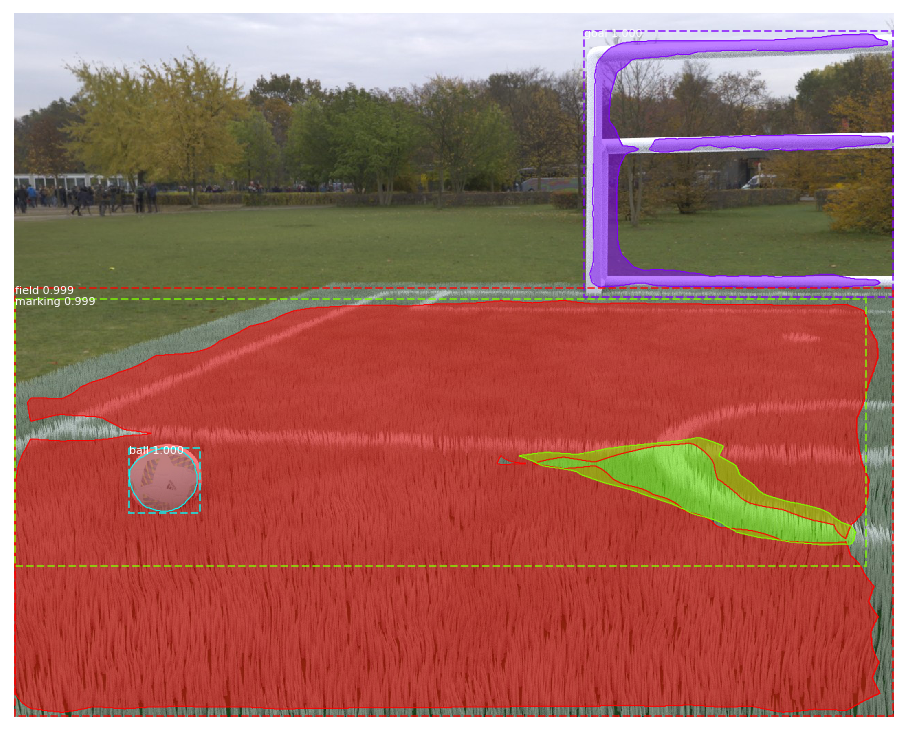

In [10]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_Path))[2]
image = skimage.io.imread(os.path.join(IMAGE_Path, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])


Processing 1 images
image                    shape: (1024, 1280, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 640, 640, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 102300, 4)        min:   -0.56657  max:    1.46641  float32


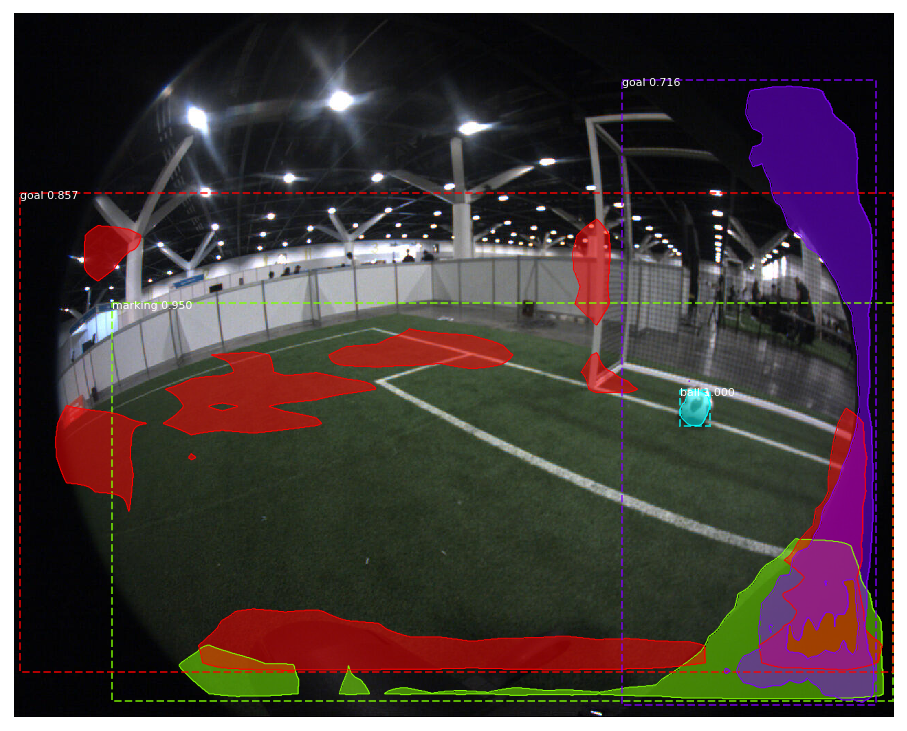

In [14]:


# Load a random image from the images folder
file_names = next(os.walk(realPhoto))[2]
image = skimage.io.imread(os.path.join(realPhoto, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])